In [1]:
import pandas as pd

# read events
df_attended_events = pd.read_csv('../../data_CityEvent/Cityevents/Demand_Intelligence_for_Attended_Events_California-0.csv')

In [2]:
# read events
import pandas as pd

df_non_attended_events = pd.read_csv('../../data_CityEvent/Cityevents/Demand_Intelligence_for_Non_Attended_Events_California-0.csv')

In [3]:
# read events
import pandas as pd

df_unscheduled_events = pd.read_csv('../../data_CityEvent/Cityevents/Demand_Intelligence_for_Unscheduled_Events_North_America-0.csv')

In [11]:
# Time distriubtion
import matplotlib.pyplot as plt

def avg_event_duration(df,df_name='event type'):

    # Convert EVENT_START and EVENT_END to datetime
    df['EVENT_START'] = pd.to_datetime(df['EVENT_START'])
    df['EVENT_END'] = pd.to_datetime(df['EVENT_END'])

    # Calculate duration in minutes
    df['DURATION'] = (df['EVENT_END'] - df['EVENT_START']).dt.total_seconds() / 60

    # Group by CATEGORY and calculate mean duration
    grouped = df.groupby('CATEGORY')['DURATION'].mean().reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(grouped['CATEGORY'], grouped['DURATION'], color='skyblue')
    plt.title(f'Average Event Duration of {df_name} by Category (in minutes)')
    plt.xlabel('Category')
    plt.ylabel('Average Duration (minutes)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'../../results/1.3_time_distribution/avg_event_duration_by_category/{df_name}.PNG', bbox_inches='tight', dpi=300)
    plt.show()


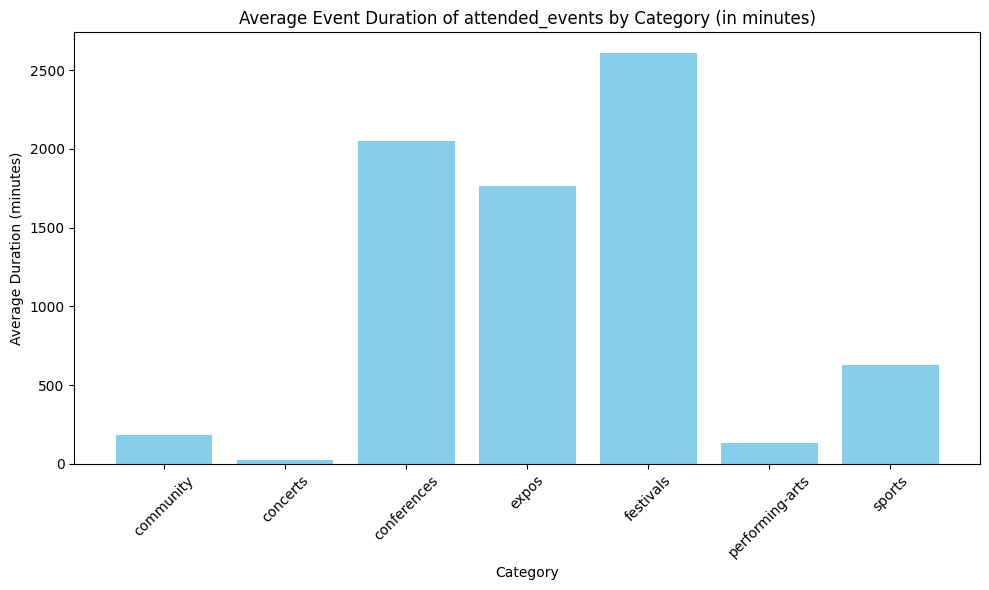

In [12]:
avg_event_duration(df_attended_events, 'attended_events')

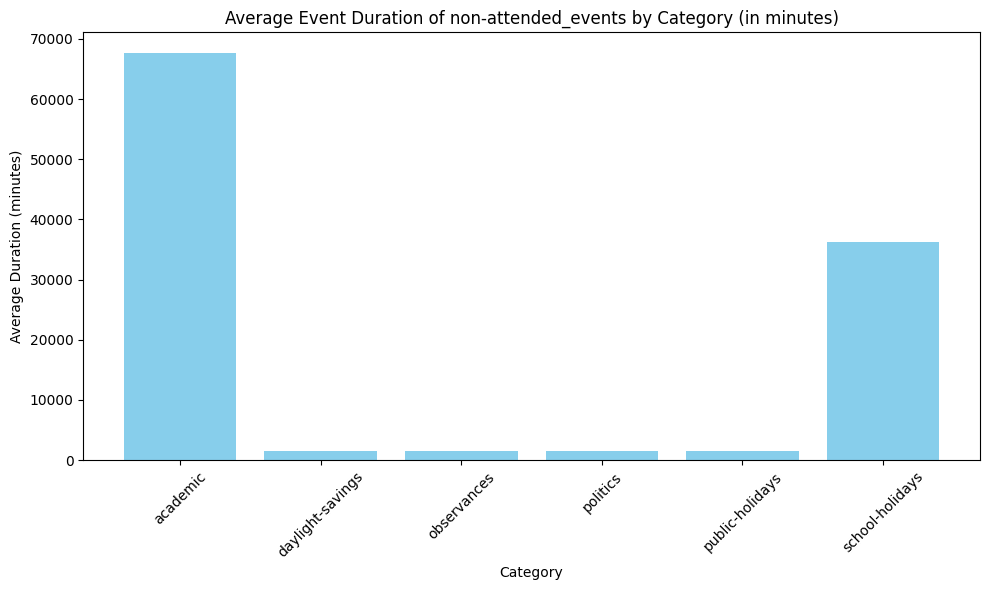

In [13]:
avg_event_duration(df_non_attended_events, 'non-attended_events')

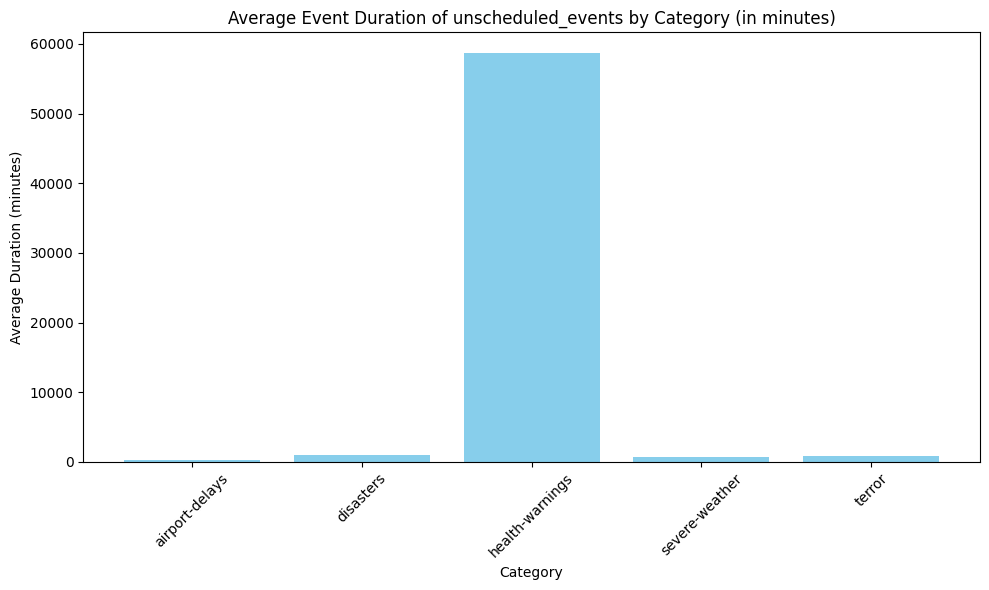

In [16]:
avg_event_duration(df_unscheduled_events, 'unscheduled_events')

In [22]:
### Events frequency by day

In [4]:
df_attended_events.shape

(217640, 32)

In [17]:
missing_count = df_attended_events['TIMEZONE'].isna().sum()
print(missing_count)

3


In [18]:
# Drop missing rows as it is only 3
df_attended_events.dropna(subset=['TIMEZONE'], inplace=True)
df_attended_events.shape

(217637, 33)

In [19]:
df_non_attended_events.shape

(20070, 33)

In [20]:
missing_count = df_non_attended_events['TIMEZONE'].isna().sum()
print(missing_count)

14441


In [21]:
# Fill missing values with America/Los_Angeles
df_non_attended_events['TIMEZONE'].fillna('America/Los_Angeles', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_45004\866383422.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_non_attended_events['TIMEZONE'].fillna('America/Los_Angeles', inplace=True)


In [23]:
df_non_attended_events['TIMEZONE'].value_counts()

TIMEZONE
America/Los_Angeles    20064
America/Chicago            6
Name: count, dtype: int64

In [24]:
df_unscheduled_events.shape

(744829, 33)

In [25]:
missing_count = df_unscheduled_events['TIMEZONE'].isna().sum()
print(missing_count)

251


In [26]:
# Drop missing rows as it is only 251
df_unscheduled_events.dropna(subset=['TIMEZONE'], inplace=True)
df_unscheduled_events.shape

(744578, 33)

In [27]:
display(df_non_attended_events.iloc[121])

EVENT_ID                                                               GbvhYPVAmiAypb4Mw5
CREATE_DT                                                         2021-08-13 04:08:18.474
UPDATE_DT                                                         2023-04-03 23:16:49.950
TITLE                                   Paradise Unified School District - Mid Winter ...
CATEGORY                                                                  school-holidays
LABELS                                              ["holiday","school","winter-holiday"]
DESCRIPTION                                                                           NaN
EVENT_START                                                           2021-02-12 00:00:00
EVENT_END                                                      2021-02-15 23:59:59.999000
PREDICTED_END                                                                         NaN
TIMEZONE                                                              America/Los_Angeles
ENTITIES  

In [25]:
# import pandas as pd
# import pytz

# def convert_to_new_york_time(df):
#     # Define the target timezone (New York Time)
#     ny_tz = pytz.timezone('America/New_York')
    
#     # List of relevant datetime columns to convert
#     datetime_columns = ['CREATE_DT', 'UPDATE_DT', 'EVENT_START', 'EVENT_END', 'ROW_INSERTED_DT', 'ROW_UPDATED_DT']
    
#     # Convert each column and create a new one with _NY suffix
#     for col in datetime_columns:
#         if col in df.columns:
#             # Convert the column to datetime
#             df[col] = pd.to_datetime(df[col], errors='coerce')
            
#             # Check if the column is timezone naive
#             if df[col].dt.tz is None:
#                 # If naive, localize to UTC first
#                 df[col + '_NY'] = df[col].dt.tz_localize('UTC').dt.tz_convert(ny_tz)
#             else:
#                 # If already timezone aware, just convert to New York time
#                 df[col + '_NY'] = df[col].dt.tz_convert(ny_tz)

#             # Convert to naive datetime (remove timezone information)
#             df[col + '_NY'] = df[col + '_NY'].dt.tz_localize(None)
    
#     return df



In [ ]:
from utils.time.time_converted_to_boston import convert_time_of_dataframe
df_attended_events_converted = convert_time_of_dataframe(df_attended_events)
df_non_attended_events_converted = convert_time_of_dataframe(df_non_attended_events)
df_unscheduled_events_converted = convert_time_of_dataframe(df_unscheduled_events)

Before conversion: NaN values in EVENT_START: 0
Before conversion: NaN values in TIMEZONE: 3
Skipping conversion: time = 2021-11-11 00:00:00, timezone = nan
Skipping conversion: time = 2021-12-18 00:00:00, timezone = nan
Skipping conversion: time = 2021-08-29 00:00:00, timezone = nan
Skipping conversion: time = 2021-11-11 23:59:59.999000, timezone = nan
Skipping conversion: time = 2021-12-18 23:59:59.999000, timezone = nan
Skipping conversion: time = 2021-08-29 23:59:59.999000, timezone = nan


In [20]:
df_non_attended_events.iloc[121]

EVENT_ID                                                               GbvhYPVAmiAypb4Mw5
CREATE_DT                                                         2021-08-13 04:08:18.474
UPDATE_DT                                                         2023-04-03 23:16:49.950
TITLE                                   Paradise Unified School District - Mid Winter ...
CATEGORY                                                                  school-holidays
LABELS                                              ["holiday","school","winter-holiday"]
DESCRIPTION                                                                           NaN
EVENT_START                                                           2021-02-12 00:00:00
EVENT_END                                                      2021-02-15 23:59:59.999000
PREDICTED_END                                                                         NaT
TIMEZONE                                                              America/Los_Angeles
ENTITIES  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def events_frequency_by_day(df, df_name='events'):
    # Convert the EVENT_START column to datetime
    df['EVENT_START_BOSTON'] = pd.to_datetime(df['EVENT_START_BOSTON'])
    print(df.shape)

    # Retain original row count by not collapsing into daily aggregates
    df['EVENT_DATE'] = df['EVENT_START_BOSTON'].dt.date
    print(f"Original data rows: {df.shape[0]}")  # Check row count

    # Count events per day per category
    df_time_distribution = df.groupby(['CATEGORY', 'EVENT_DATE']).size().reset_index(name='EVENT_COUNT')
    print(f"Rows after grouping by date and category: {df_time_distribution.shape[0]}")

    # Set the style for the plots
    sns.set(style="whitegrid")

    # Get the unique categories
    categories = df_time_distribution['CATEGORY'].unique()
    print(categories)
    # Create a separate plot for each category
    for category in categories:
        plt.figure(figsize=(12, 6))
        category_data = df_time_distribution[df_time_distribution['CATEGORY'] == category]
        print(f"Category '{category}' data rows: {category_data.shape[0]}")  # Debug row count per category

        # Create a line plot for the category
        sns.lineplot(data=category_data, x='EVENT_DATE', y='EVENT_COUNT')
        
        plt.title(f'Daily Distribution of {df_name} - {category}')
        plt.xlabel('Event Start Date (America/New York Time)')
        plt.ylabel('Number of Events')
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # Save the image with high resolution
        plt.savefig(f'../../results/1.3_time_distribution/daily_distribution/{df_name}_{category}.PNG', bbox_inches='tight', dpi=300)
        plt.show()

# Example usage
# df = pd.read_csv('path_to_your_data.csv')
# events_frequency_by_day(df)


(217637, 37)
Original data rows: 217637
Rows after grouping by date and category: 8425
['community' 'concerts' 'conferences' 'expos' 'festivals'
 'performing-arts' 'sports']
Category 'community' data rows: 1252


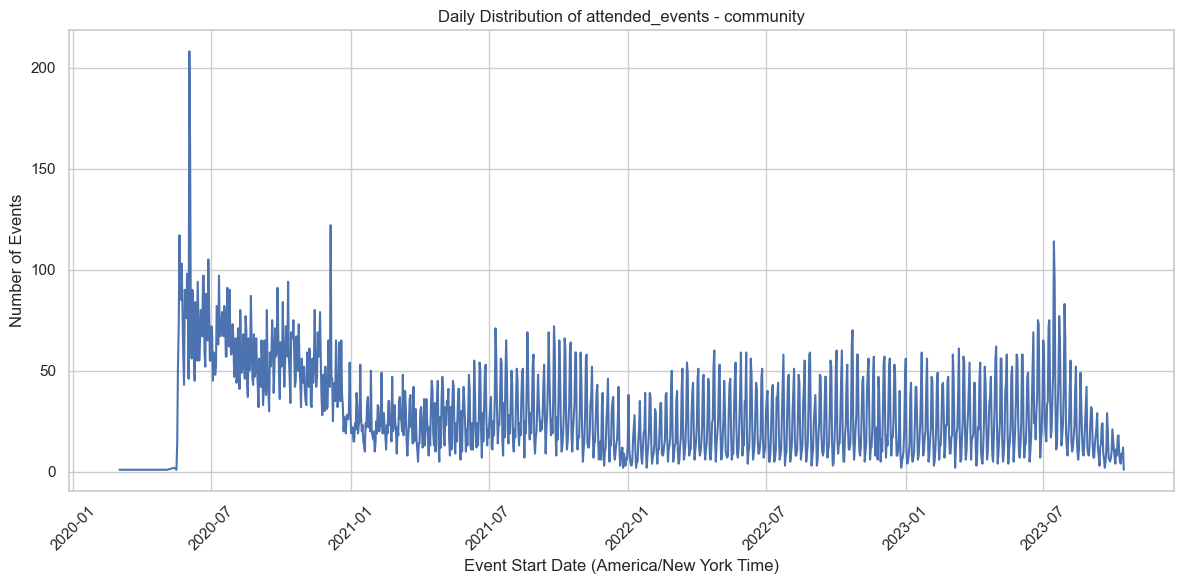

Category 'concerts' data rows: 1246


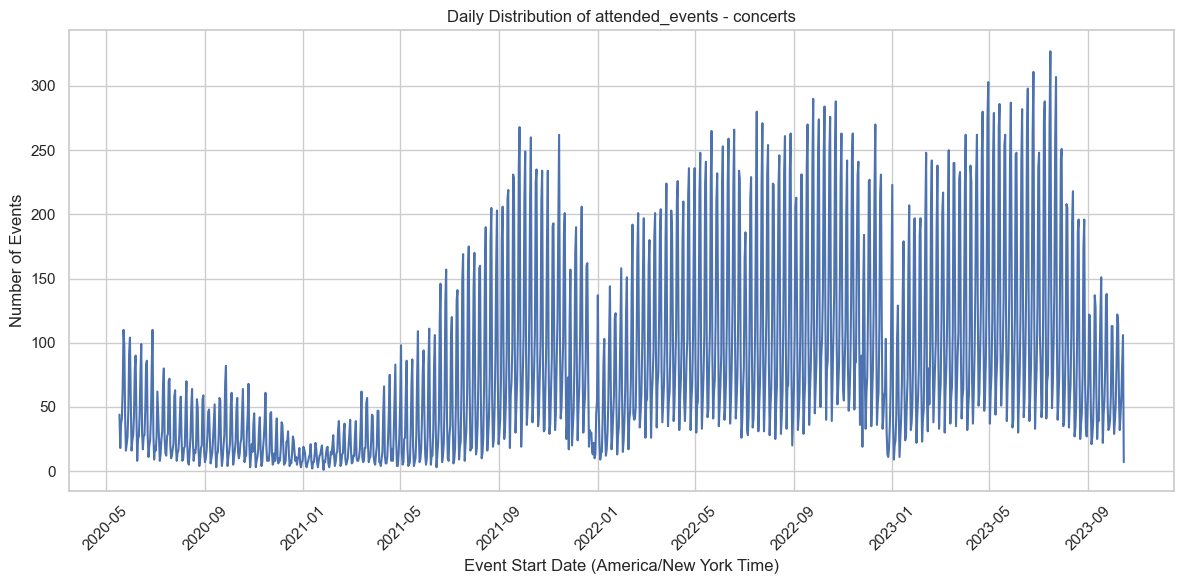

Category 'conferences' data rows: 1196


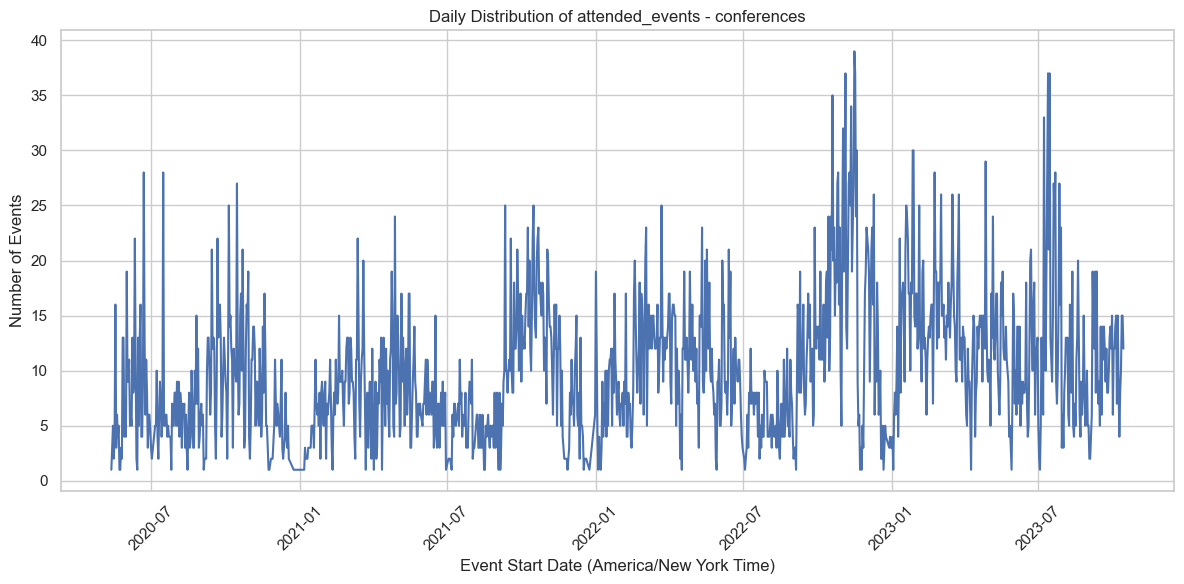

Category 'expos' data rows: 1182


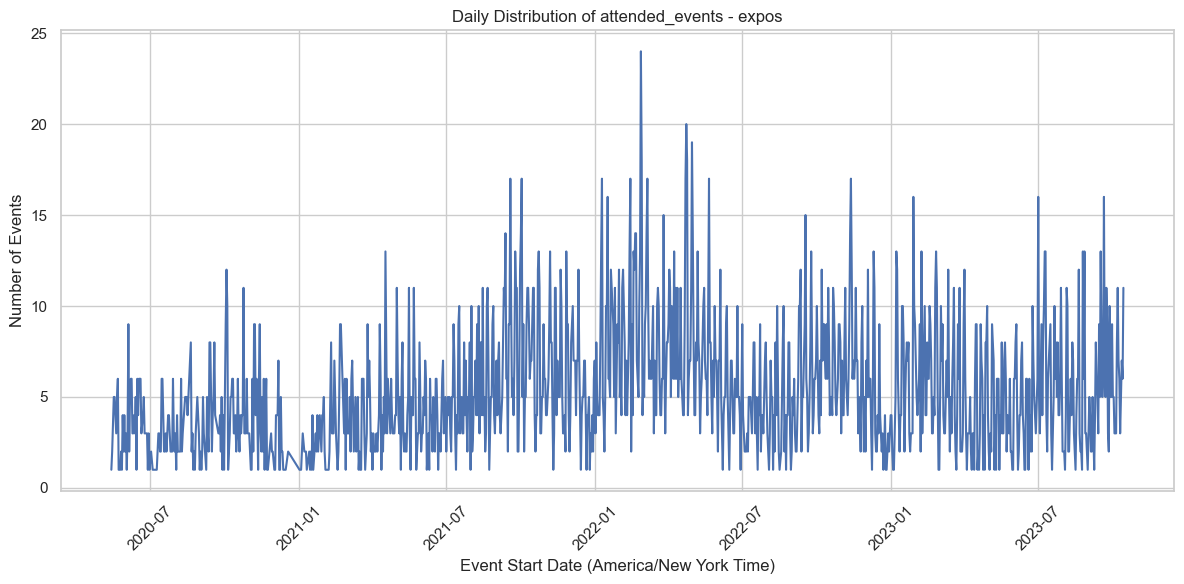

Category 'festivals' data rows: 1086


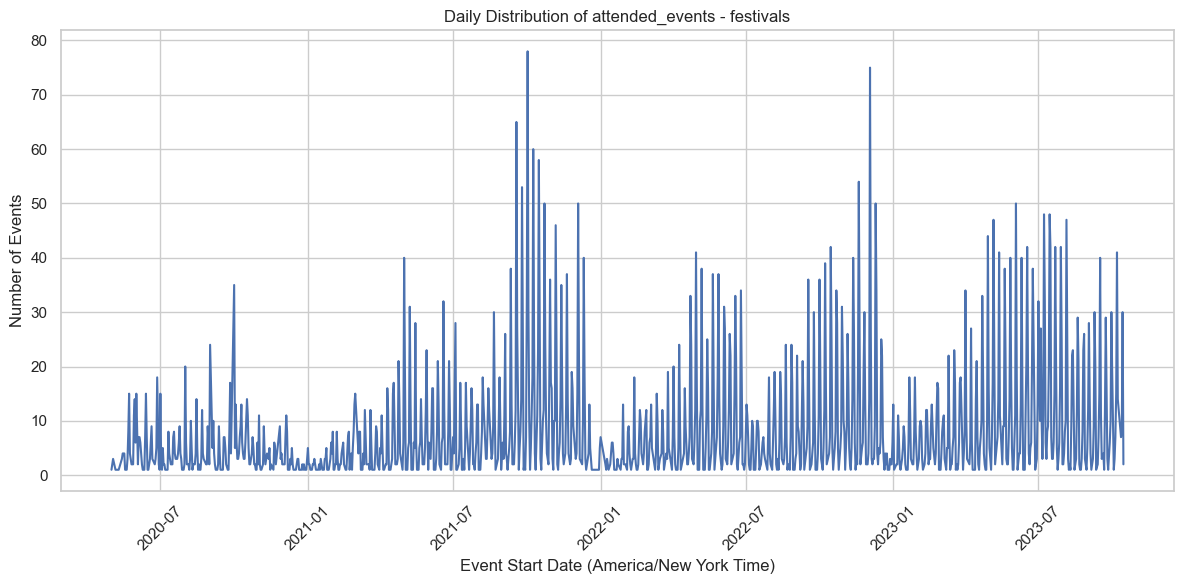

Category 'performing-arts' data rows: 1246


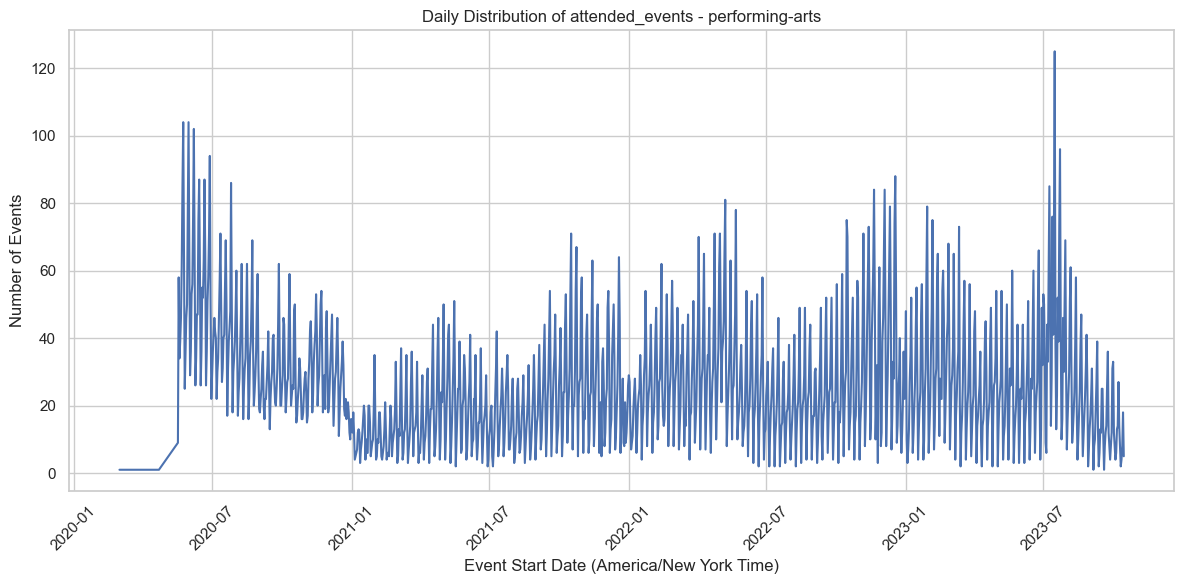

Category 'sports' data rows: 1217


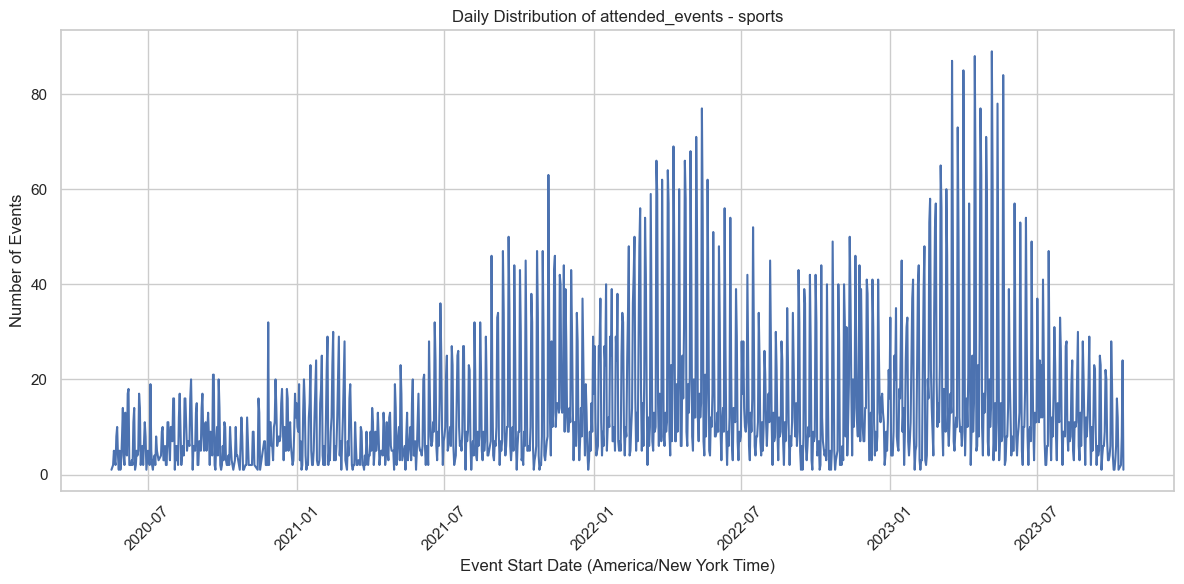

In [30]:
events_frequency_by_day(df_attended_events_converted, df_name='attended_events')

(20070, 37)
Original data rows: 20070
Rows after grouping by date and category: 1650
['academic' 'daylight-savings' 'observances' 'politics' 'public-holidays'
 'school-holidays']
Category 'academic' data rows: 506


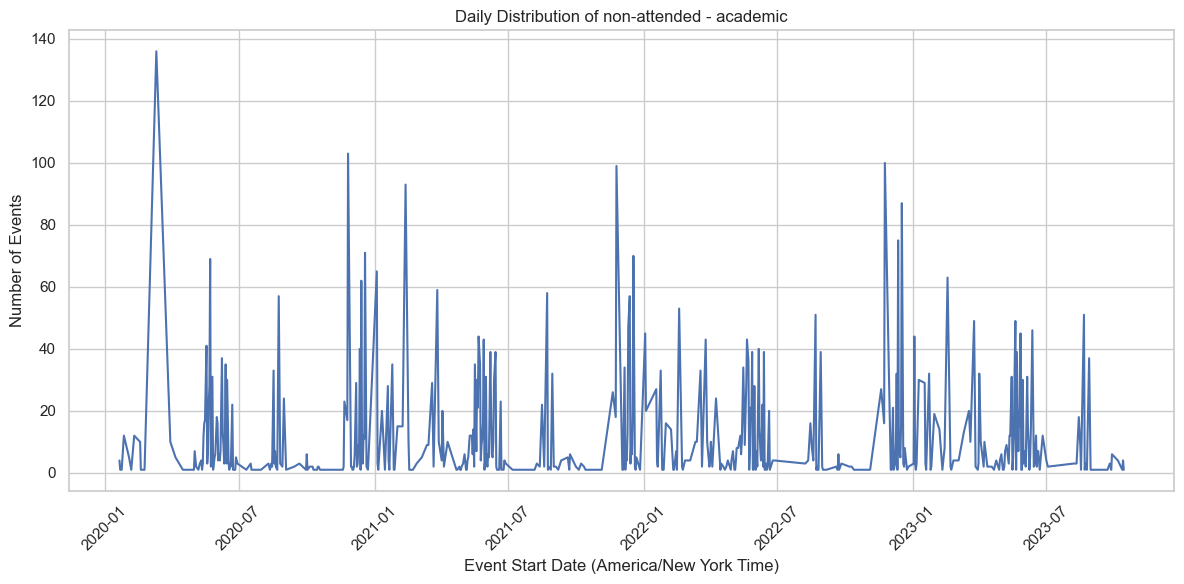

Category 'daylight-savings' data rows: 6


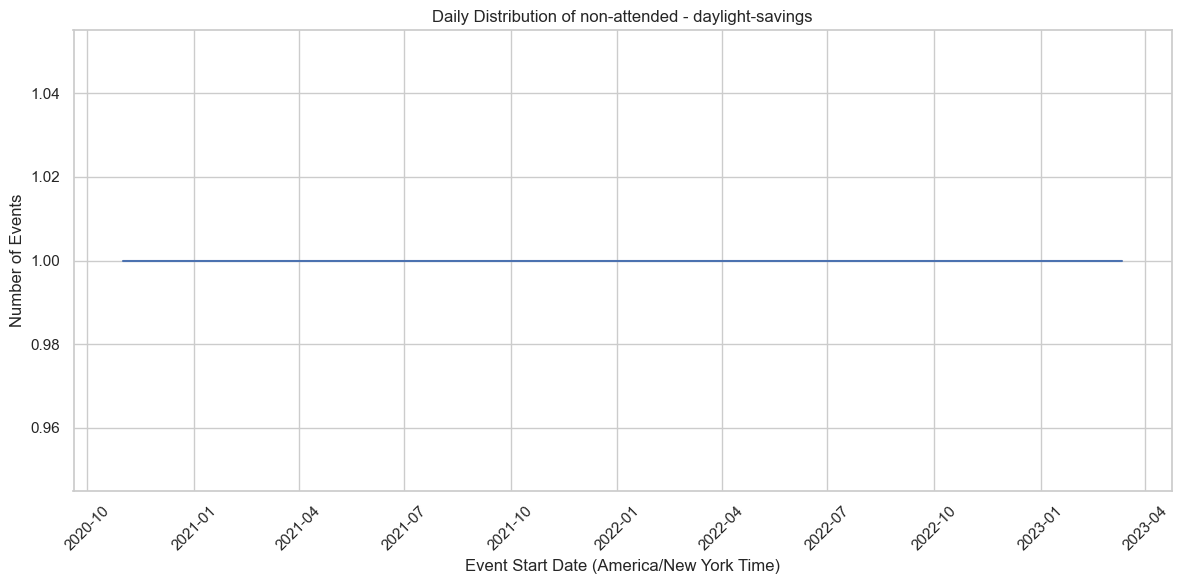

Category 'observances' data rows: 782


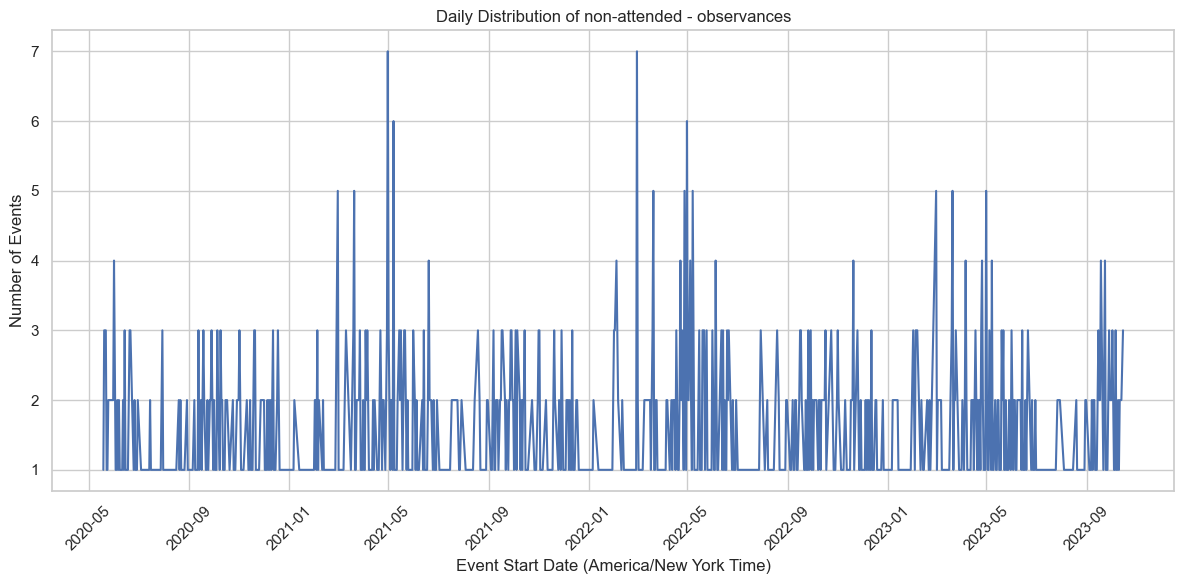

Category 'politics' data rows: 4


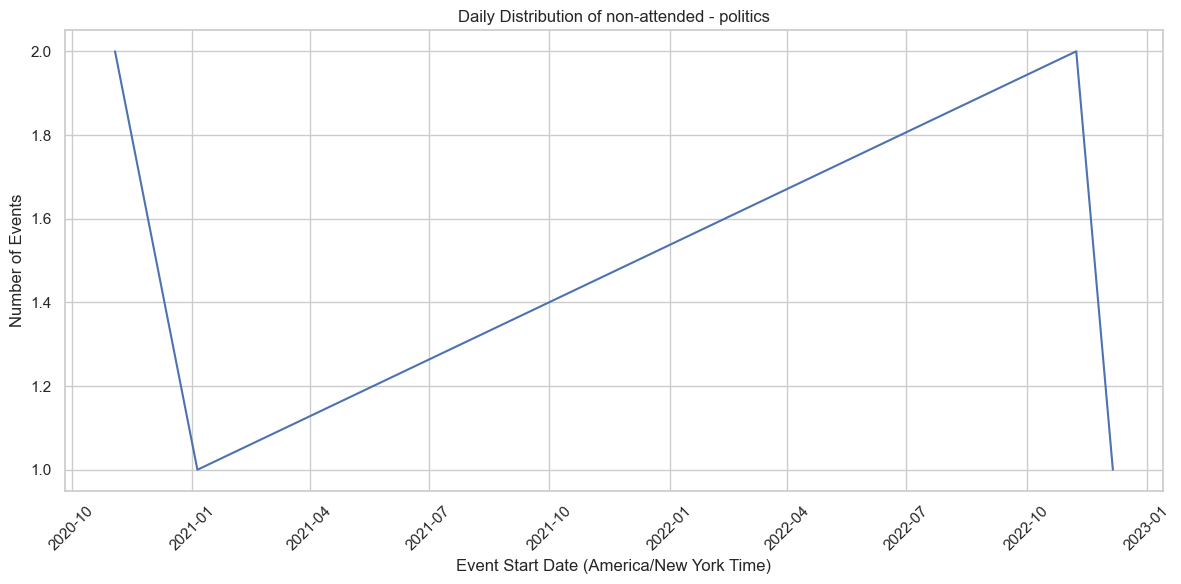

Category 'public-holidays' data rows: 63


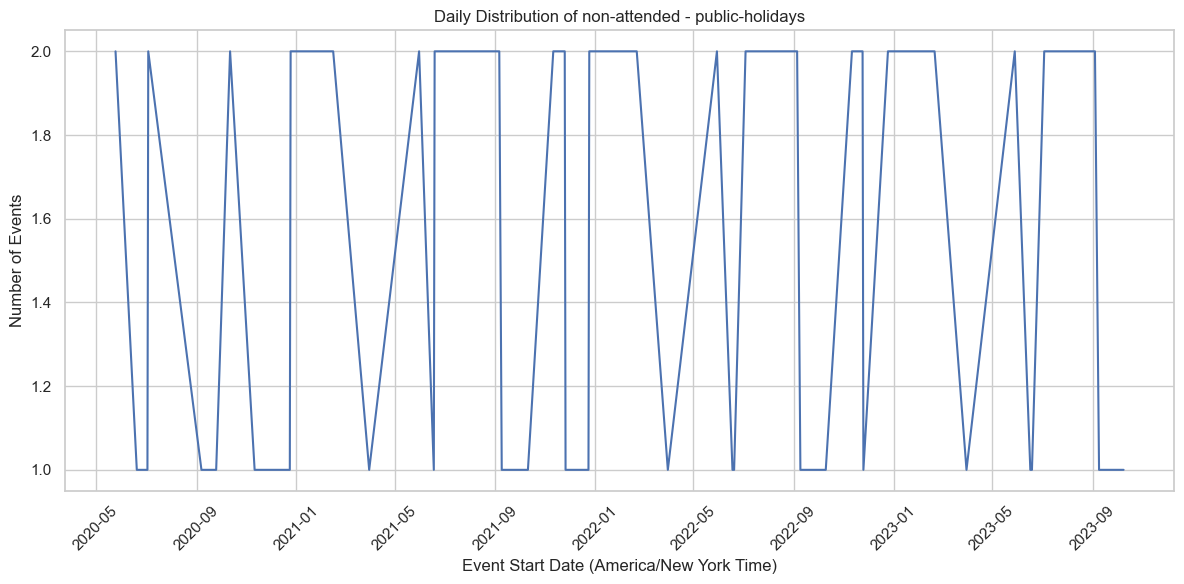

Category 'school-holidays' data rows: 289


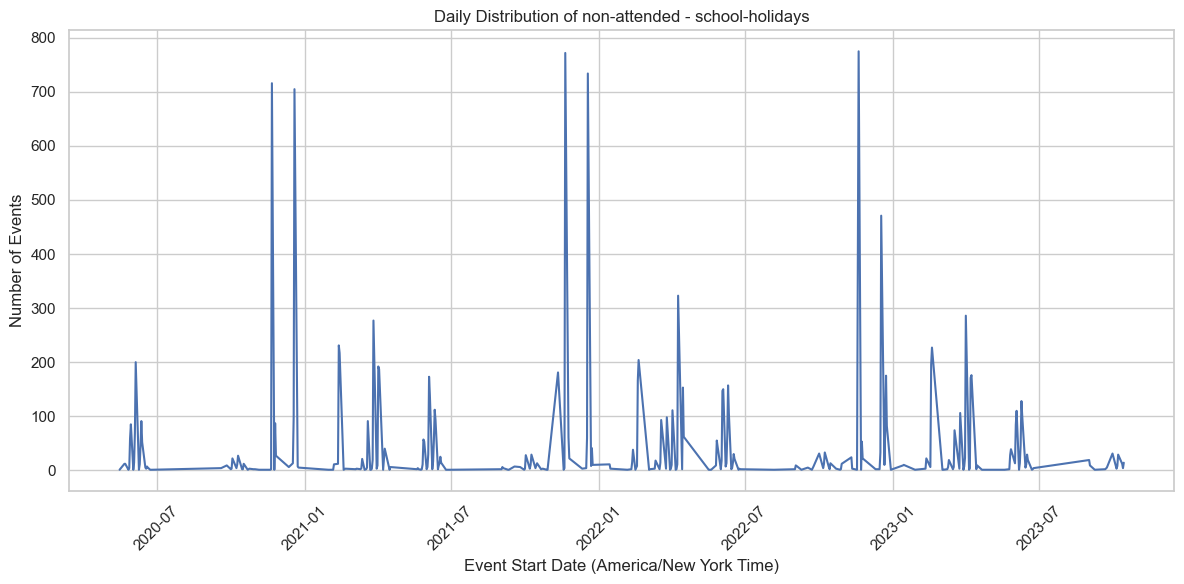

In [31]:
events_frequency_by_day(df_non_attended_events_converted, df_name='non-attended')

(744578, 37)
Original data rows: 744578
Rows after grouping by date and category: 4453
['airport-delays' 'disasters' 'health-warnings' 'severe-weather' 'terror']
Category 'airport-delays' data rows: 1157


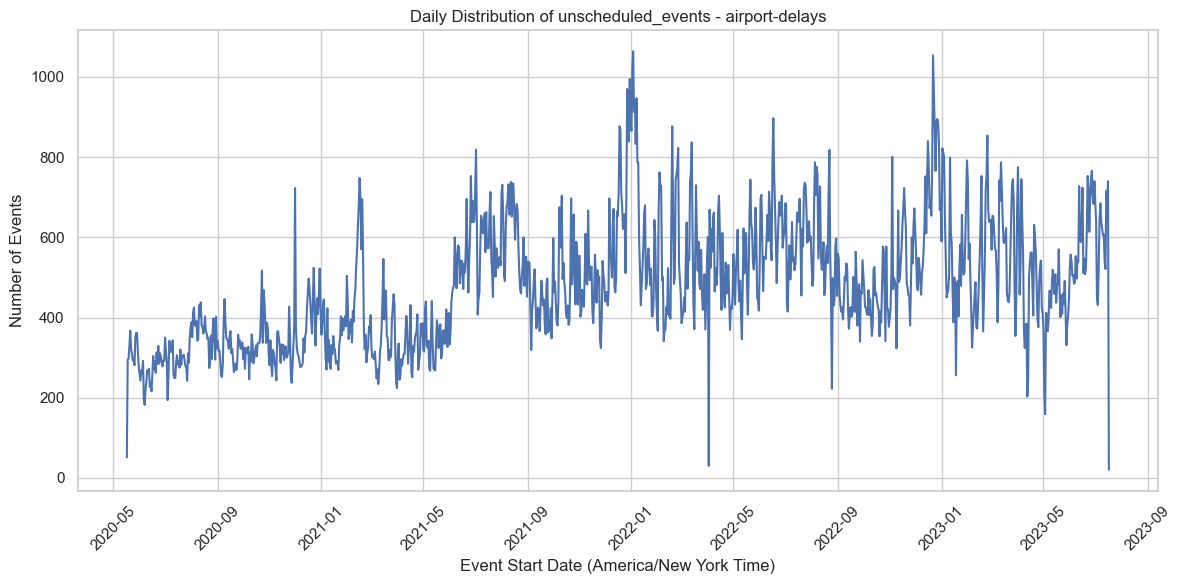

Category 'disasters' data rows: 1040


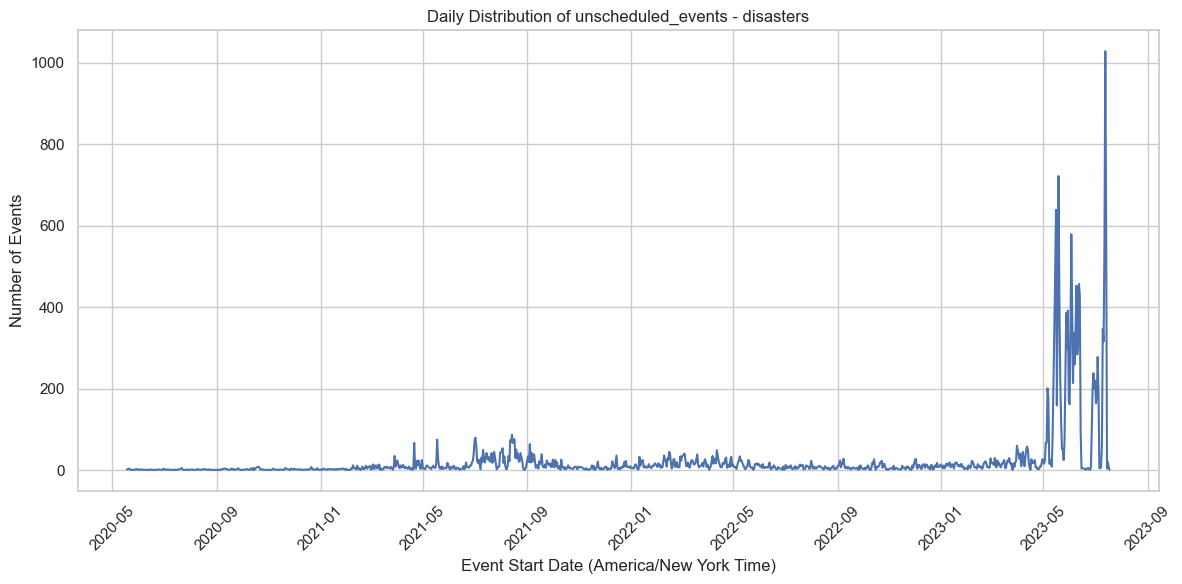

Category 'health-warnings' data rows: 249


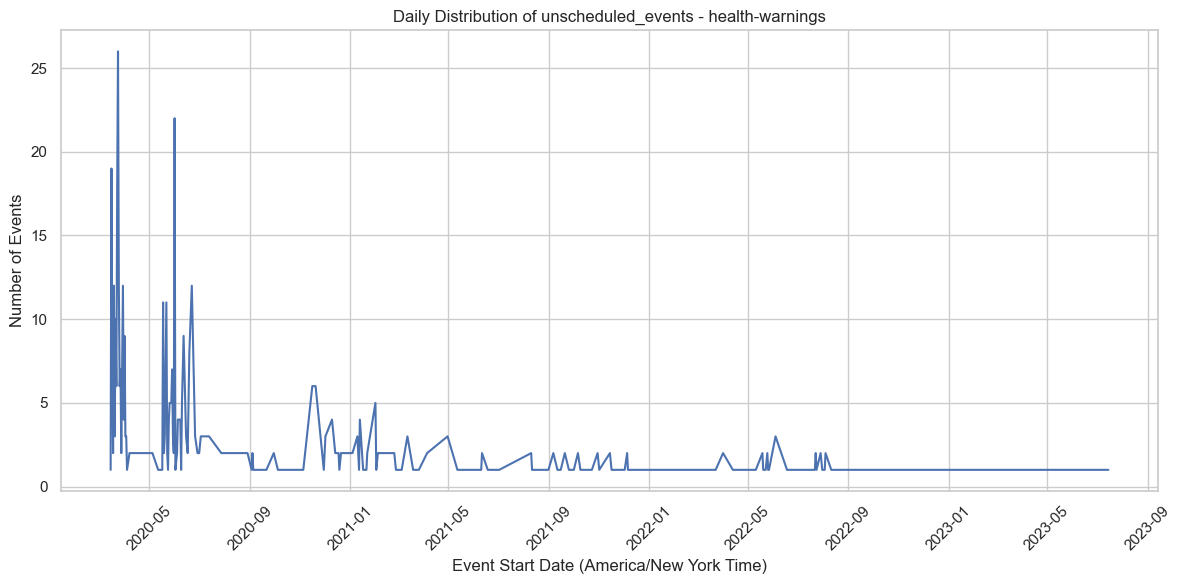

Category 'severe-weather' data rows: 1178


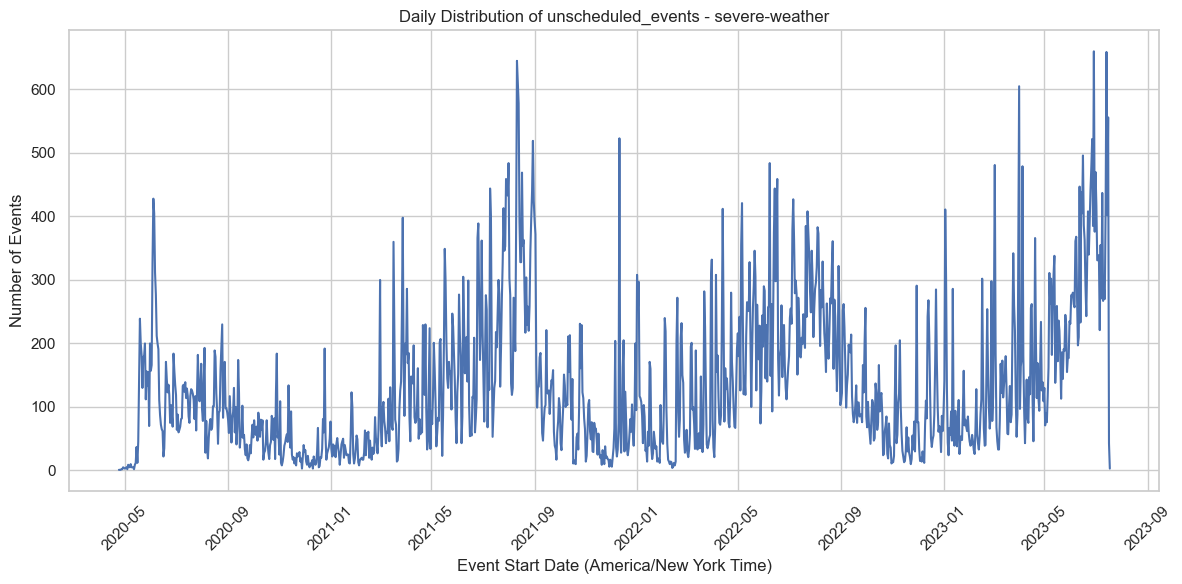

Category 'terror' data rows: 829


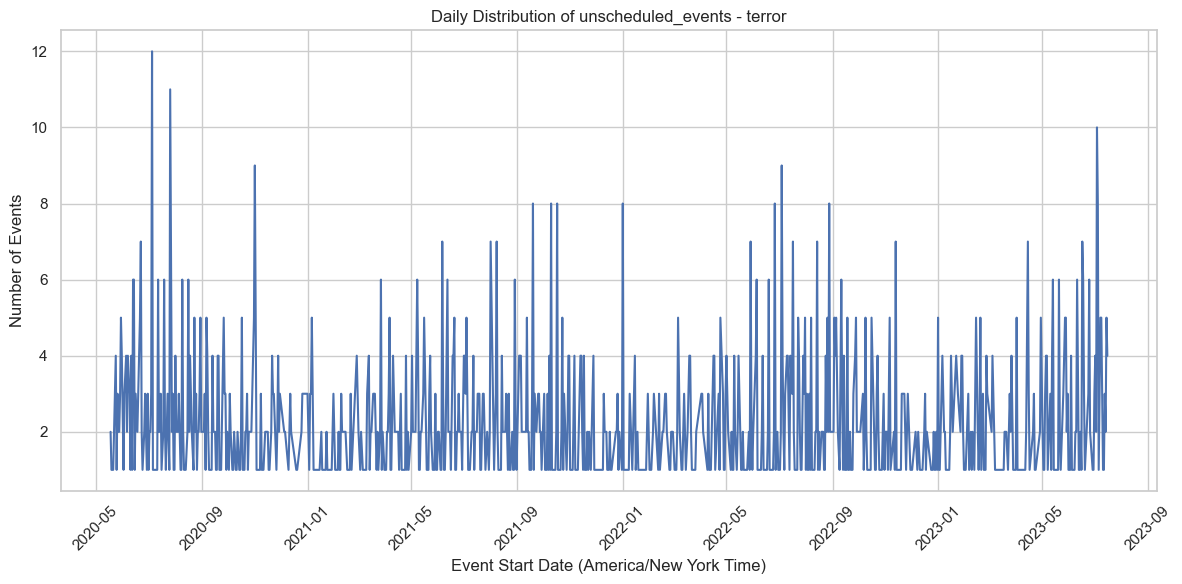

In [32]:
events_frequency_by_day(df_unscheduled_events_converted, df_name='unscheduled_events')

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def events_frequency_by_day_all_categories(df, df_name='events'):
    # Convert the EVENT_START column to datetime
    df['EVENT_START'] = pd.to_datetime(df['EVENT_START'])

    # Create a new DataFrame to count events per category and start date
    df_time_distribution = df_attended_events.groupby(['CATEGORY', df['EVENT_START'].dt.date]).size().reset_index(name='EVENT_COUNT')

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    # Create a scatterplot for each category with decreased marker size
    sns.scatterplot(data=df_time_distribution, x='EVENT_START', y='EVENT_COUNT', hue='CATEGORY', marker='o', s=20)  # 's' controls marker size

    plt.title('Time Distribution of Events by Category')
    plt.xlabel('Event Start Date')
    plt.ylabel('Number of Events')
    plt.xticks(rotation=45)
    plt.legend(title='Category')
    plt.tight_layout()
    # Save the image with high resolution
    plt.savefig(f'..\\results\\time_distribution\\daily_{df_name}_all_categories.PNG', bbox_inches='tight', dpi=300)  
    plt.show()
    plt.show()


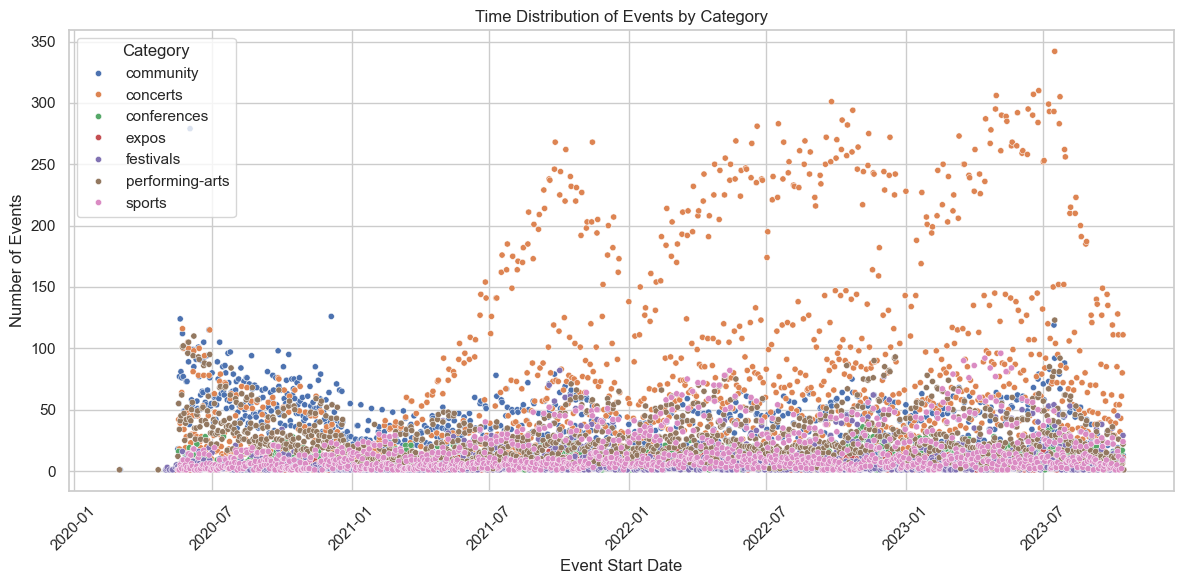

In [34]:
events_frequency_by_day_all_categories(df_attended_events_converted, df_name='attended_events')

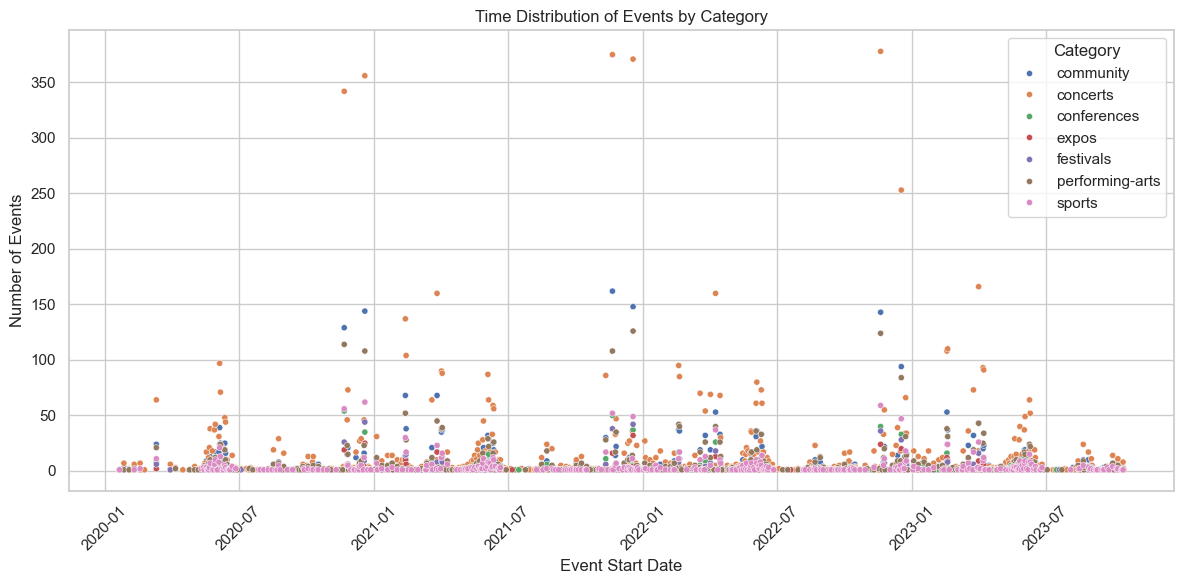

In [35]:
events_frequency_by_day_all_categories(df_non_attended_events_converted, df_name='non-attended_events')

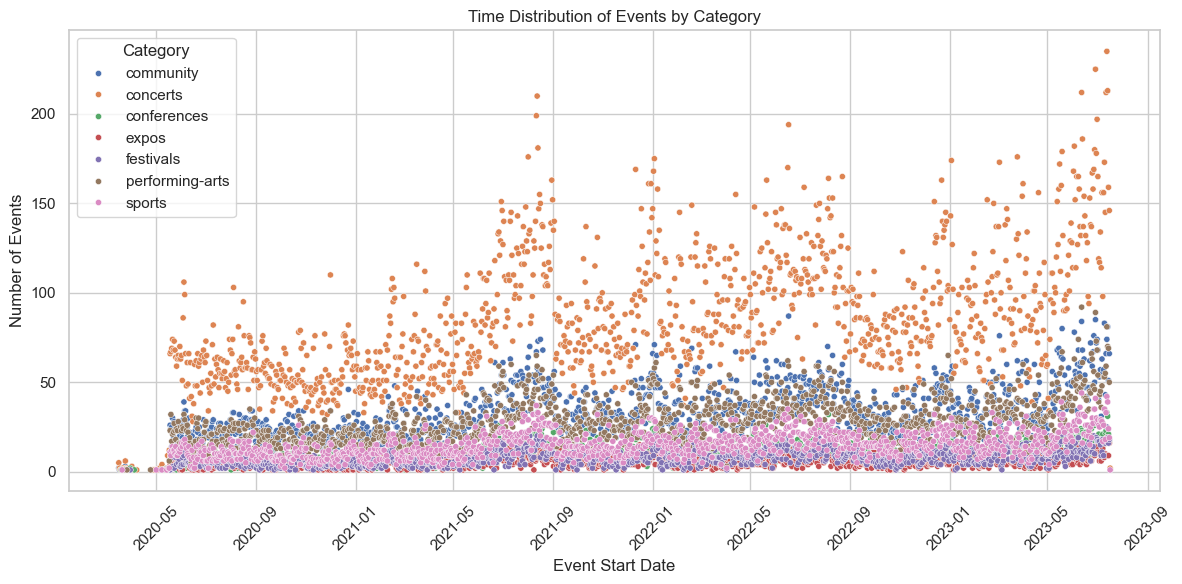

In [36]:
events_frequency_by_day_all_categories(df_unscheduled_events_converted, df_name='unscheduled_events')